# EE4211 Project

## Question 1

Group name:

Group members: Liu Tianshu, Nie Hongtuo, Pan Jie, Zhang Chenxi

### Question 1.1

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df = pd.read_csv('dataport-export_gas_oct2015-mar2016.csv')

First let's get the number of houses.

In [2]:
grouped = df.groupby(['dataid'], sort=['localminute'])
len(grouped)

157

or

In [3]:
df.dataid.value_counts().size

157

We have gas flow meters installed in 157 houses.
Now we can find the anomaly samples in the data.

In [4]:
defect_id = []
for key,group in grouped:
    val = group.meter_value.values
    diff = val[1:] - val[:-1]
    defect_time = np.where(diff < 0)[0] + 1
    if len(defect_time):
        defect_id.append(key)
        defect_time = group.localminute.values[defect_time]
        print('The glitches of gas meter No.', key, 'happened in the moments below:')
        print(defect_time, '\n')

The glitches of gas meter No. 35 happened in the moments below:
['2015-10-20 09:00:12-05'] 

The glitches of gas meter No. 77 happened in the moments below:
['2015-10-20 20:20:55-05'] 

The glitches of gas meter No. 94 happened in the moments below:
['2015-11-01 01:11:10-06' '2015-11-01 01:17:53-06'
 '2015-11-01 01:23:12-06' '2016-01-16 10:23:43.197562-06'
 '2016-01-18 11:19:47.220413-06' '2016-01-18 11:26:52.211985-06'] 

The glitches of gas meter No. 483 happened in the moments below:
['2015-10-21 00:18:54-05'] 

The glitches of gas meter No. 484 happened in the moments below:
['2015-11-01 01:18:29-06' '2015-11-01 01:34:43-06'
 '2015-11-01 01:40:00-06' '2015-11-01 01:44:34-06'
 '2015-11-01 01:48:31-06' '2015-11-01 01:55:28-06'
 '2016-03-05 00:01:58.770374-06' '2016-03-05 01:43:22.133007-06'
 '2016-03-05 01:57:57.625975-06'] 

The glitches of gas meter No. 1042 happened in the moments below:
['2015-10-07 14:32:08-05'] 

The glitches of gas meter No. 1086 happened in the moments below:

In [5]:
print('The ID of the', len(defect_id), 'defective meters are:')
print(defect_id)

The ID of the 43 defective meters are:
[35, 77, 94, 483, 484, 1042, 1086, 1185, 1507, 1556, 1718, 1790, 1801, 2129, 2335, 2449, 3134, 3527, 3544, 3893, 4031, 4193, 4514, 4998, 5129, 5131, 5193, 5403, 5810, 5814, 5892, 6836, 7017, 7030, 7117, 7739, 7794, 7989, 8156, 8890, 9134, 9639, 9982]


43 gas meters have sent values that decreased at some point.
Let's look inside the data series given by a defective meter, for example, gas meter No. 9982.

(array([-200.,    0.,  200.,  400.,  600.,  800., 1000., 1200., 1400.,
        1600., 1800.]),
 <a list of 11 Text major ticklabel objects>)

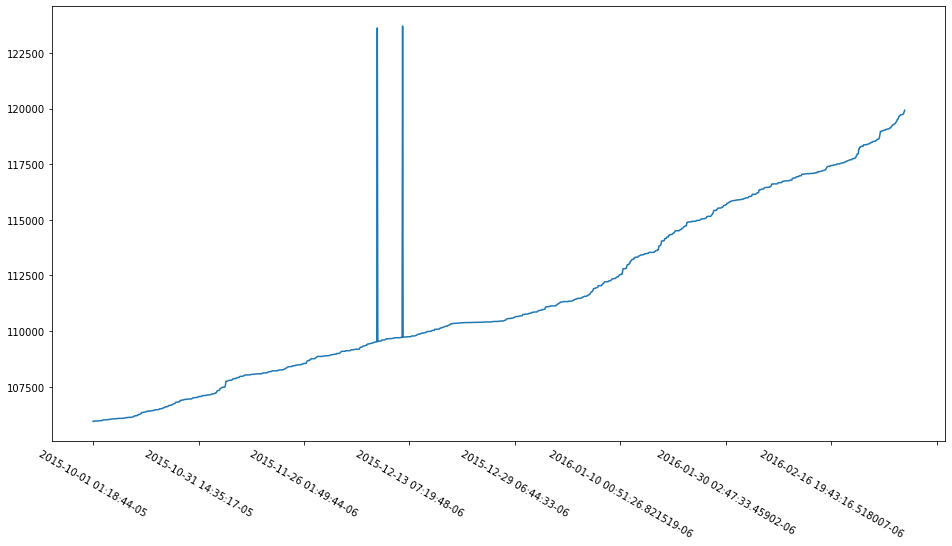

In [6]:
group = grouped.get_group(9982)
t = group.localminute.values
val = group.meter_value.values

s = pd.Series(val, index=t)
s.plot(figsize=(16, 8))
plt.xticks(rotation=-30)

### Question 1.2

#### Data Preprocessing

Since there are glitches in some of the data series, we need to smooth the data first.
There are 2 kinds of glitches: sudden increase and slight decrease, both of which are shown below. The slight decrease can be hard to spot for human eyes, but can be seen in the printed data samples below the figure. We will replace the impulses and fluctuations with the last available values before them.

Note that we decided not to take summer time into consideration, since time zone will not affect the way how people consume the gas. A family that usually cook at 7 pm will still cook at 7 no matter summer time is used or not.

Text(0.5, 1.0, 'Gas meter No. 9134')

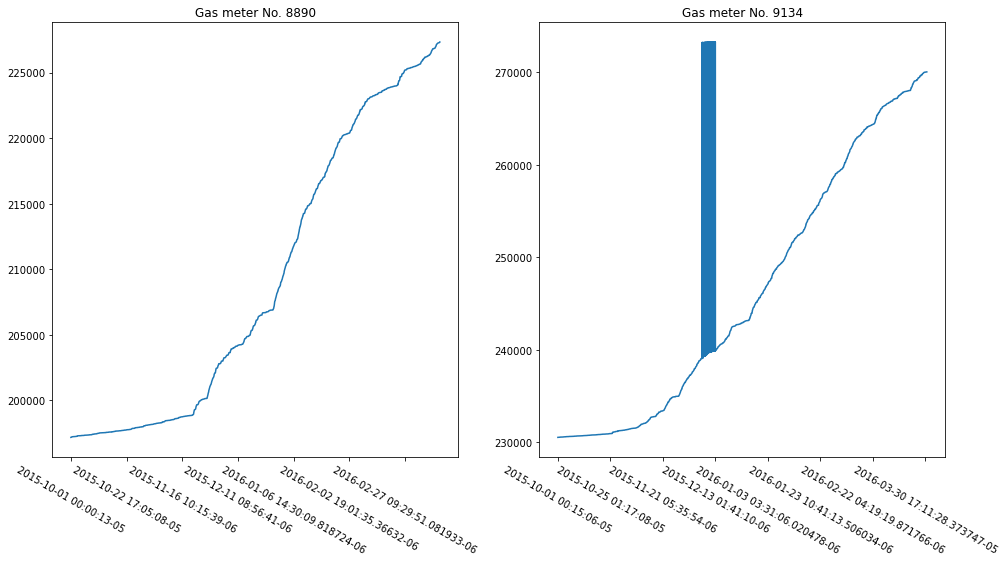

In [7]:
group = grouped.get_group(8890)
t = group.localminute.values
val = group.meter_value.values
s = pd.Series(val, index=t)

plt.subplot(121)
s.plot(figsize=(16, 8))
plt.xticks(rotation=-30)
plt.title("Gas meter No. 8890")

group = grouped.get_group(9134)
t = group.localminute.values
val = group.meter_value.values
s = pd.Series(val, index=t)

plt.subplot(122)
s.plot(figsize=(16, 8))
plt.xticks(rotation=-30)
plt.title("Gas meter No. 9134")

Here are the data samples before and after the time when glitches happened. All values under each **ID** is smaller than those under **ID - 1**.

In [8]:
defect_info = []
for key,group in grouped:
    val = group.meter_value.values
    diff = val[1:] - val[:-1]
    defect_time = np.where(diff < 0)[0] + 1
    if len(defect_time):
        for defect_key in defect_time:
            defect_info.append([key, defect_key, val[defect_key - 3], val[defect_key - 2], val[defect_key - 1], val[defect_key], val[defect_key + 1]])

defect_df = pd.DataFrame(defect_info, columns=['Meter ID', 'Sample ID', 'ID - 3','ID - 2', 'ID - 1', 'ID + 0', 'ID + 1'])
pd.set_option('display.max_rows', None)
print(defect_df)

      Meter ID  Sample ID  ID - 3  ID - 2  ID - 1  ID + 0  ID + 1
0           35        958   93998   93998   94014   94012   94014
1           77       1518   59254   59254   59260   59258   59262
2           94       7380  117626  117626  117626  117614  117626
3           94       7383  117614  117626  117626  117614  117626
4           94       7385  117626  117614  117626  117616  117620
5           94      22298  129598  129602  129602  129598  129598
6           94      22712  130306  130306  130316  130306  130306
7           94      22716  130306  130306  130316  130310  130316
8          483       2590  361130  361140  361144  361130  361144
9          484       7496  100416  100418  100418  100416  100416
10         484       7500  100416  100416  100418  100416  100418
11         484       7502  100418  100416  100418  100416  100418
12         484       7504  100418  100416  100418  100416  100418
13         484       7506  100418  100416  100418  100416  100418
14        

Now let's get the data prettier.

In [9]:
for key,group in grouped:
    val = group.meter_value.values
    diff = val[1:] - val[:-1]
    defect_time = np.where(diff < 0)[0] + 1
    if len(defect_time):
        for i in range(1,len(val)):
            if val[i] > val[-1]:
                val[i] = val[i - 1]
            elif val[i] < val[i - 1]:
                val[i] = val[i - 1]
        df.loc[df['dataid'] == key, 'meter_value'] = val

Then we can recheck if there are any decreasing data samples in our dataset.

In [10]:
grouped = df.groupby(['dataid'], sort=['localminute'])

defect_id = []
for key,group in grouped:
    val = group.meter_value.values
    diff = val[1:] - val[:-1]
    defect_time = np.where(diff < 0)[0] + 1
    if len(defect_time):
        defect_id.append(key)

if len(defect_id) == 0:
    print('No glitches found.')

No glitches found.


There isn't any decreasing anymore! We can see the difference from the two figures below.

Text(0.5, 1.0, 'Gas meter No. 9134')

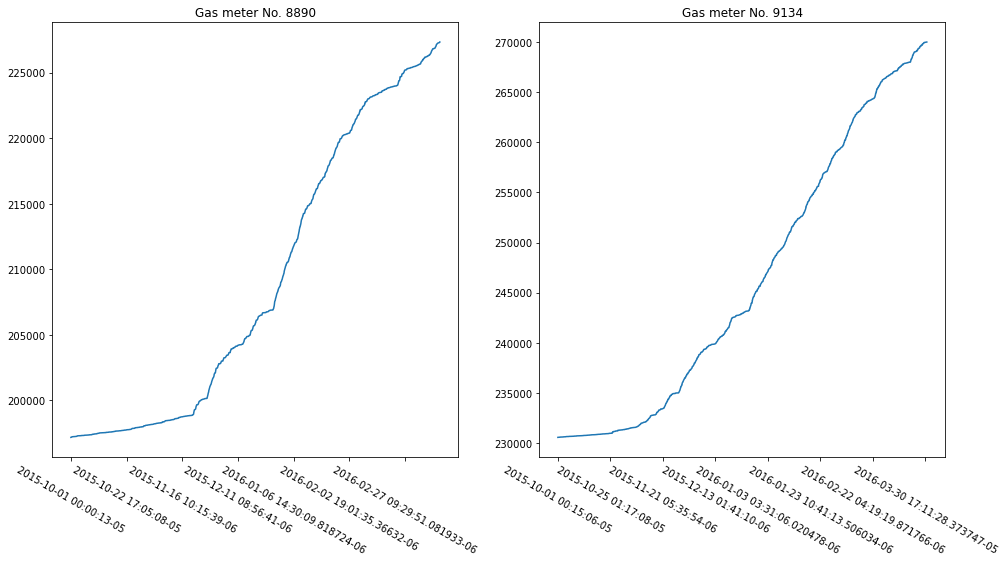

In [11]:
group = grouped.get_group(8890)
t = group.localminute.values
val = group.meter_value.values
s = pd.Series(val, index=t)

plt.subplot(121)
s.plot(figsize=(16, 8))
plt.xticks(rotation=-30)
plt.title("Gas meter No. 8890")

group = grouped.get_group(9134)
t = group.localminute.values
val = group.meter_value.values
s = pd.Series(val, index=t)

plt.subplot(122)
s.plot(figsize=(16, 8))
plt.xticks(rotation=-30)
plt.title("Gas meter No. 9134")